In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.linalg as LA

import Hamiltonian as Hamiltonian
import Plotting as plotting
import constants as cst

### Exploring the Hamiltonian: Generating 3 sets of band structures

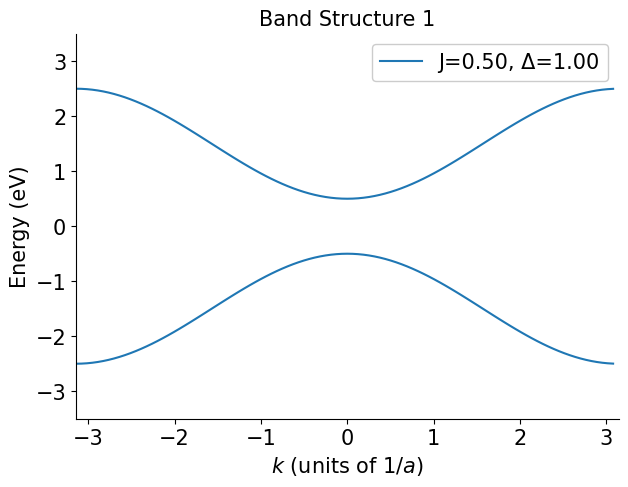

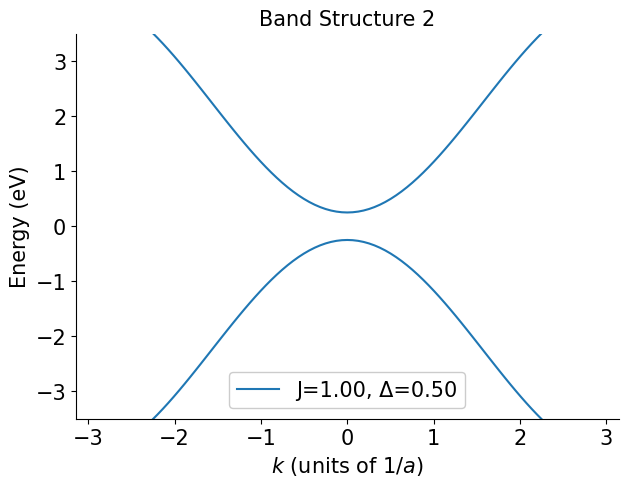

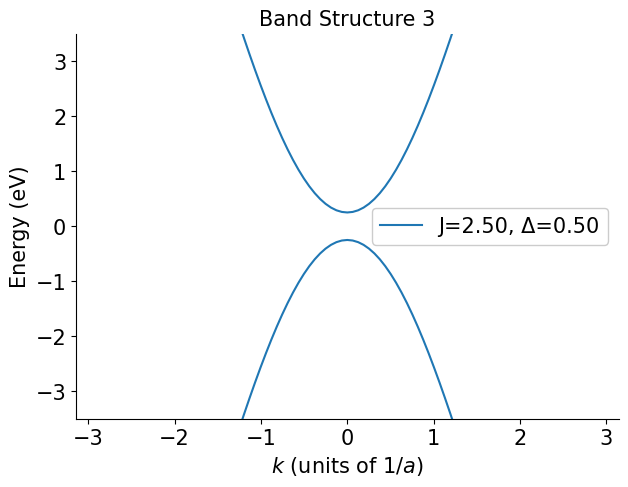

0

In [4]:
k_vals = np.linspace(-np.pi, np.pi, 101)[:-1]

#---------- First plot : -------------------

J_list     = np.array([0.5])/cst.Ry
delta_list = np.array([1])/cst.Ry


valence_bands    = {}
conduction_bands = {}
for J in J_list:
    for Δ in delta_list:
        valence_bands[J,Δ]    = Hamiltonian.eps_vb( k_vals, J, Δ )
        conduction_bands[J,Δ] = Hamiltonian.eps_cb( k_vals, J, Δ )

limits=np.array([[-np.pi,np.pi],[-3.5,3.5]])

plotting.plot_band_structure(
    Title="Band Structure 1", k_vals=k_vals, J_list=J_list, delta_list=delta_list, vb=valence_bands, cb=conduction_bands, limits=limits, fout='')


#---------- Second plot : -------------------

J_list     = np.array([1.0])/cst.Ry
delta_list = np.array([0.5])/cst.Ry


valence_bands    = {}
conduction_bands = {}
for J in J_list:
    for Δ in delta_list:
        valence_bands[J,Δ]    = Hamiltonian.eps_vb( k_vals, J, Δ )
        conduction_bands[J,Δ] = Hamiltonian.eps_cb( k_vals, J, Δ )

limits=np.array([[-np.pi,np.pi],[-3.5,3.5]])

plotting.plot_band_structure("Band Structure 2", k_vals, J_list, delta_list, valence_bands, conduction_bands, limits,fout='')



#---------- Third plot : -------------------

J_list     = np.array([2.5])/cst.Ry
delta_list = np.array([0.5])/cst.Ry


valence_bands    = {}
conduction_bands = {}
for J in J_list:
    for Δ in delta_list:
        valence_bands[J,Δ]    = Hamiltonian.eps_vb( k_vals, J, Δ )
        conduction_bands[J,Δ] = Hamiltonian.eps_cb( k_vals, J, Δ )

limits=np.array([[-np.pi,np.pi],[-3.5,3.5]])

plotting.plot_band_structure("Band Structure 3", k_vals, J_list, delta_list, valence_bands, conduction_bands, limits,fout='')



### Exploring the E Field: Generating 3 different fields

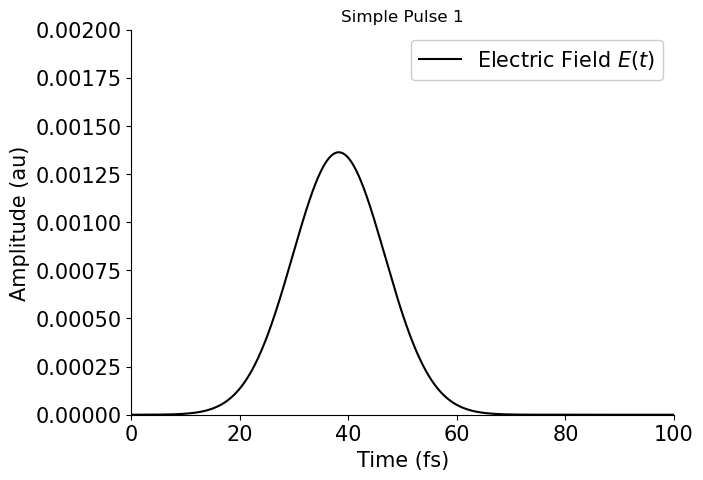

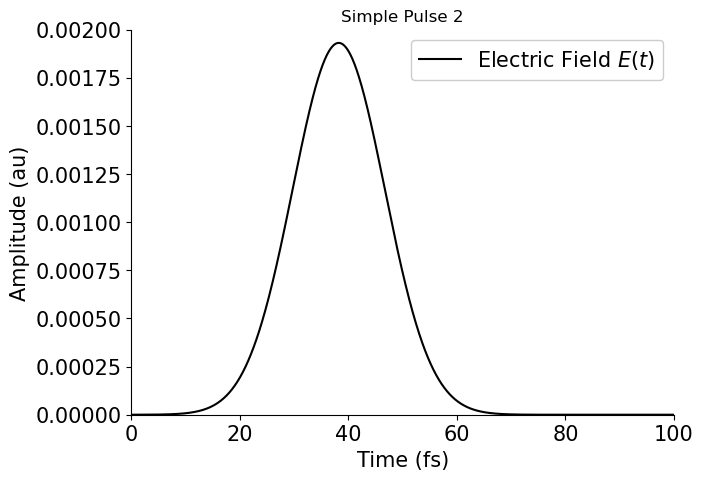

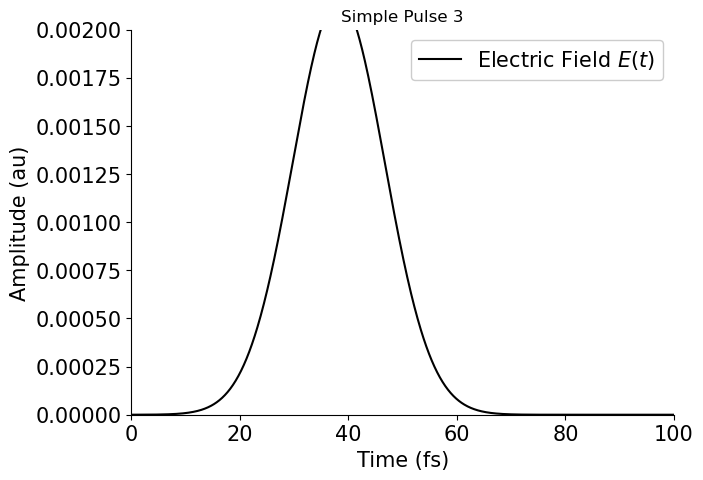

0

In [5]:
case=1

t = np.linspace(0, 100, 1000)/ cst.tfs

#-------------- Simple Pulse 1 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.2

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Simple Pulse 1",t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')




#-------------- Simple Pulse 2 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.7

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Simple Pulse 2", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')



#-------------- Simple Pulse 3 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.9

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Simple Pulse 3", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')



### Exploring the 9 possible combinations of the above 

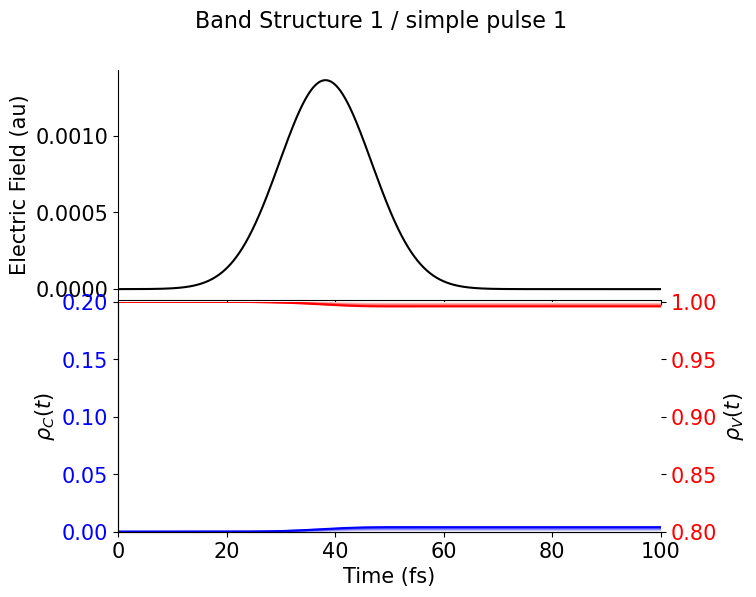

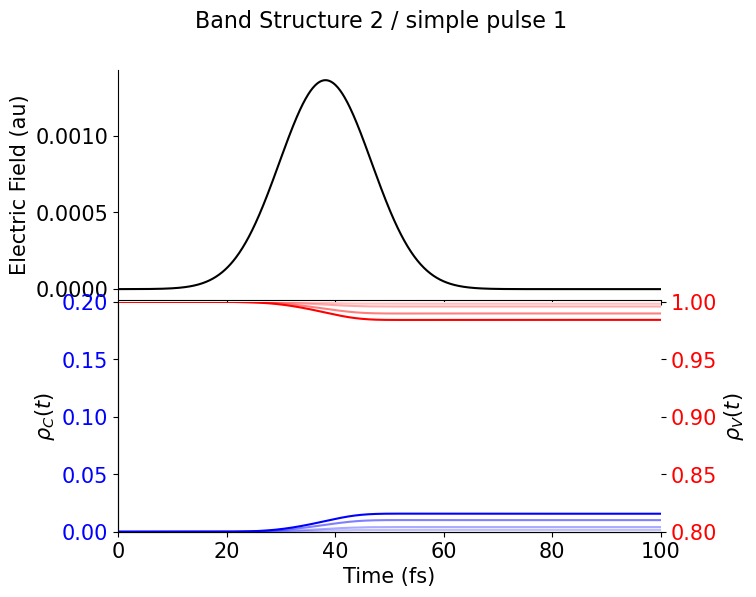

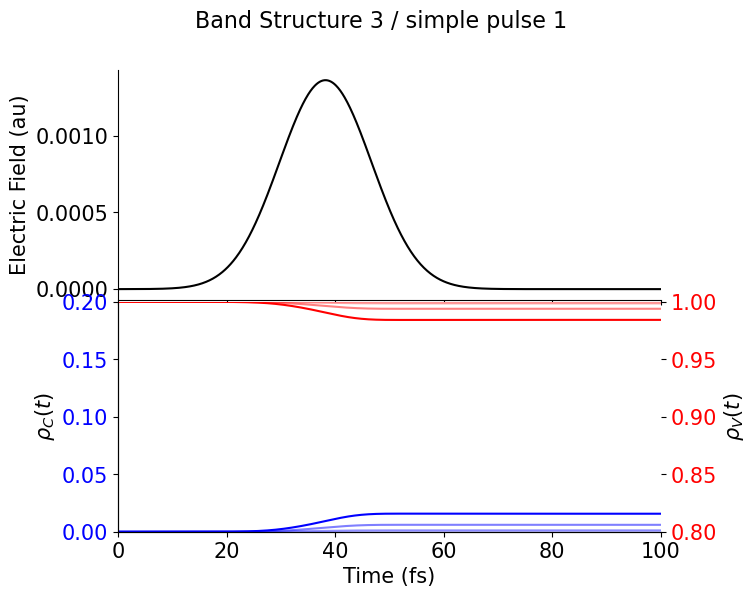

0

In [6]:
#-------------- Simple Pulse 1 --------------
#case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.2

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Simple Pulse 1",t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')




#------------ Band Structure 1 / simple pulse 1 --------------

J     = 0.5/cst.Ry
delta = 1/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 1 / simple pulse 1", t*cst.tfs,efield_case1,k_list,solutions.real,limits)





#------------ Band Structure 2 / simple pulse 1 --------------

J     = 1/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 2 / simple pulse 1", t*cst.tfs,efield_case1,k_list,solutions.real,limits)



#------------ Band Structure 3 / simple pulse 1 --------------

J     = 2.5/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 3 / simple pulse 1", t*cst.tfs,efield_case1,k_list,solutions.real,limits)

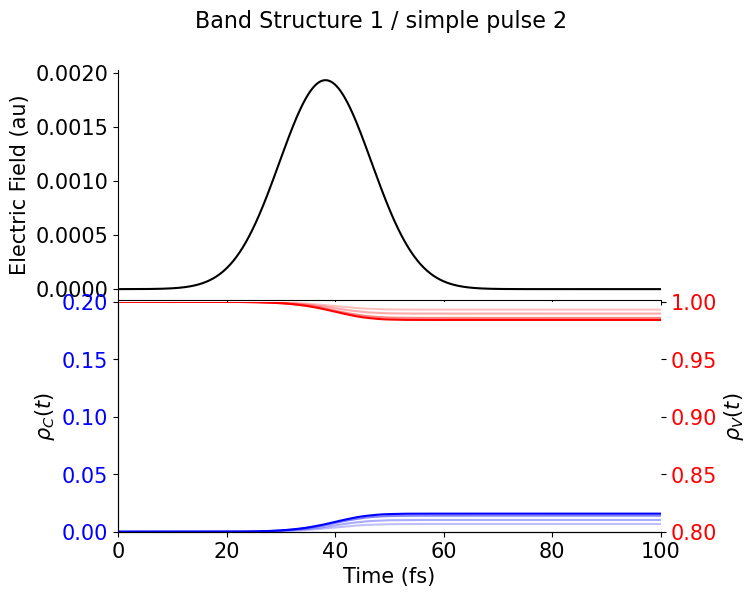

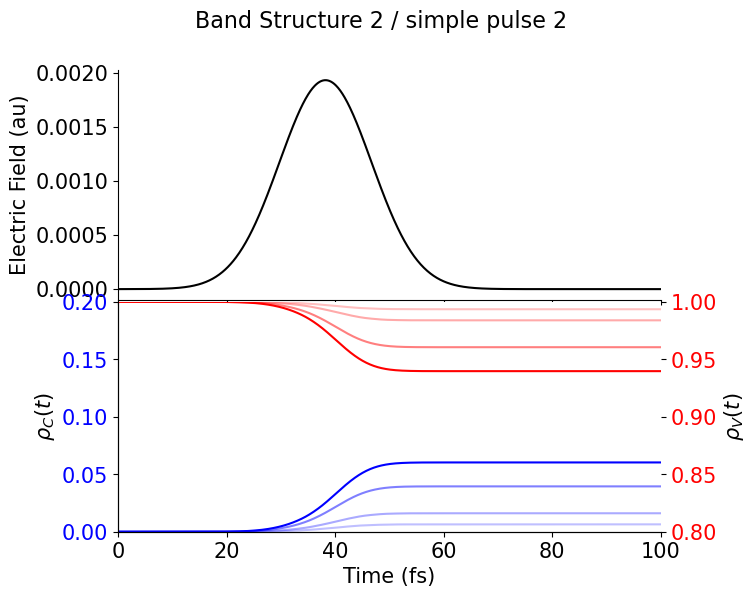

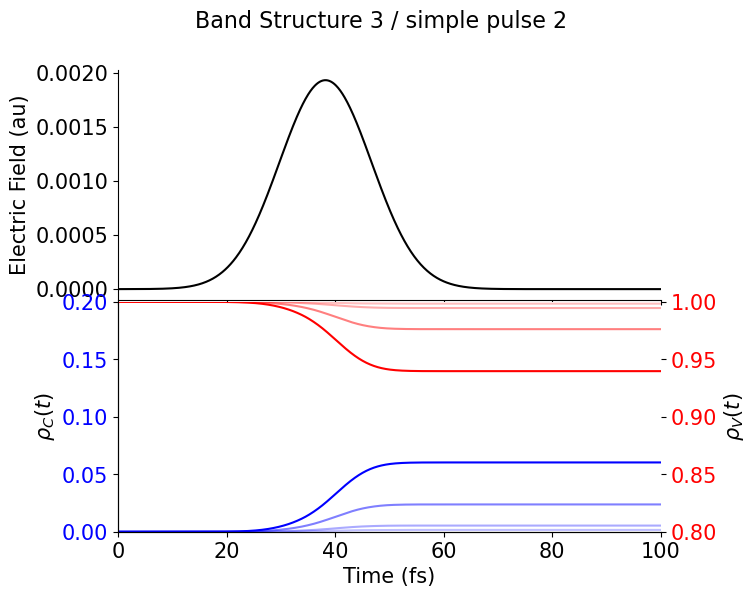

0

In [7]:
#-------------- Simple Pulse 2 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.7

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Simple Pulse 2", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')



#------------ Band Structure 1 / simple pulse 2 --------------

J     = 0.5/cst.Ry
delta = 1/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 1 / simple pulse 2", t*cst.tfs,efield_case1,k_list,solutions.real,limits)





#------------ Band Structure 2 / simple pulse 2 --------------

J     = 1/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 2 / simple pulse 2", t*cst.tfs,efield_case1,k_list,solutions.real,limits)



#------------ Band Structure 3 / simple pulse 2 --------------

J     = 2.5/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 3 / simple pulse 2", t*cst.tfs,efield_case1,k_list,solutions.real,limits)

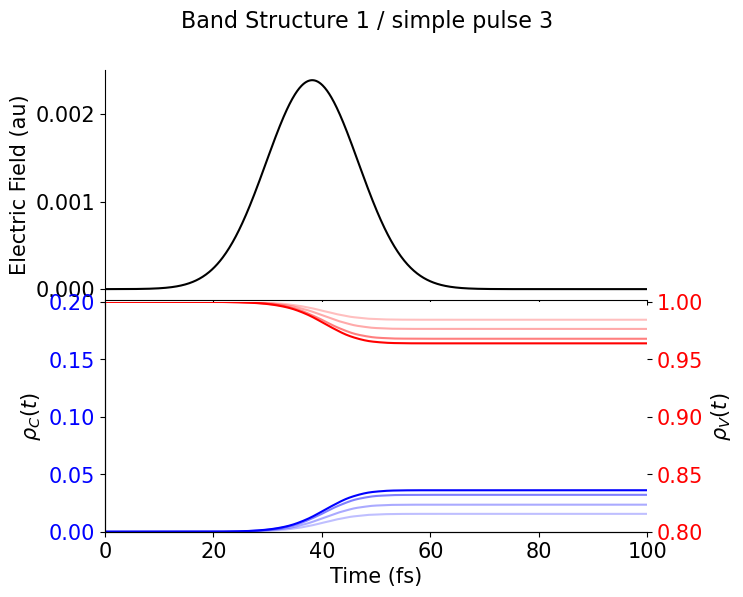

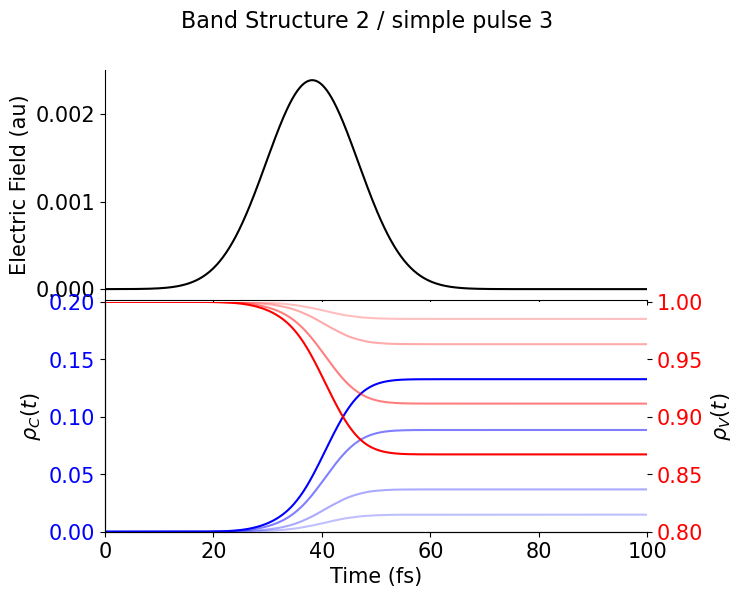

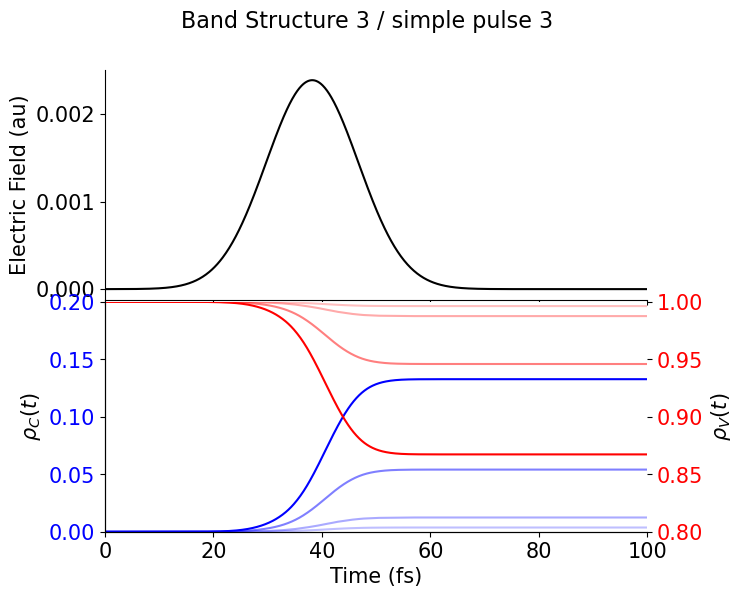

0

In [8]:

#-------------- Simple Pulse 3 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 2.1

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Simple Pulse 3", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')



#------------ Band Structure 1 / simple pulse 3 --------------

J     = 0.5/cst.Ry
delta = 1/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 1 / simple pulse 3", t*cst.tfs,efield_case1,k_list,solutions.real,limits)





#------------ Band Structure 2 / simple pulse 3 --------------

J     = 1/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 2 / simple pulse 3", t*cst.tfs,efield_case1,k_list,solutions.real,limits)



#------------ Band Structure 3 / simple pulse 3 --------------

J     = 2.5/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 3 / simple pulse 3", t*cst.tfs,efield_case1,k_list,solutions.real,limits)


### Exploring the envelope E field: 3 cases

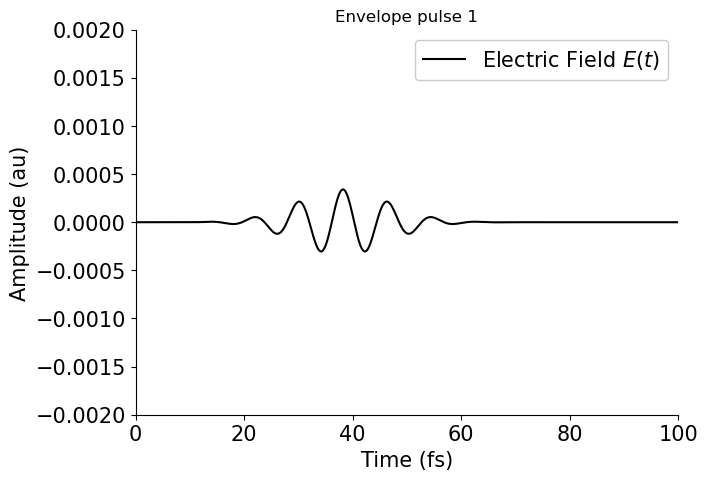

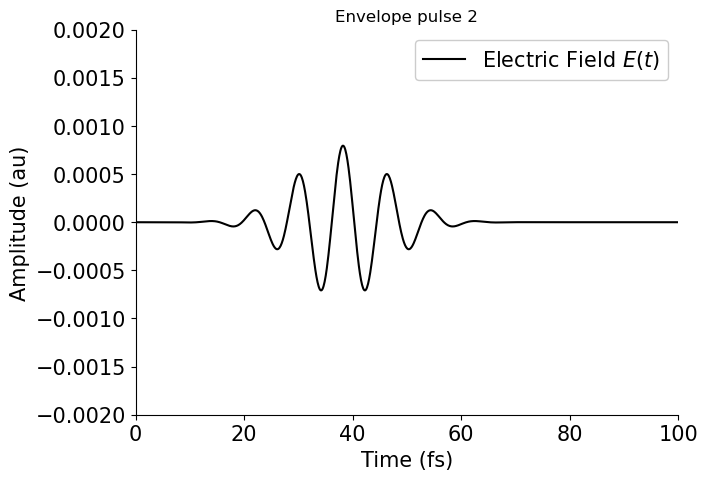

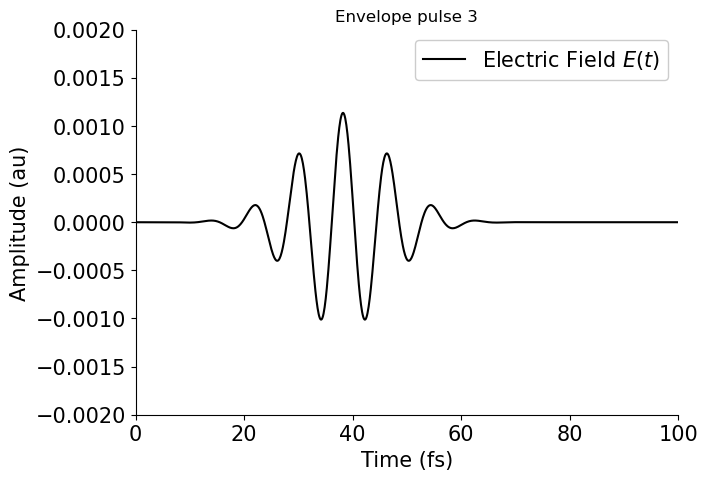

0

In [9]:
case=2

t = np.linspace(0, 100, 1000)/ cst.tfs


#---------------- Envelope pulse 1 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.3

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Envelope pulse 1", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')


#---------------- Envelope pulse 2 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.7

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Envelope pulse 2", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')


#---------------- Envelope pulse 3 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.0

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Envelope pulse 3", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')







### Exploring the 9 possible combinations of the above 

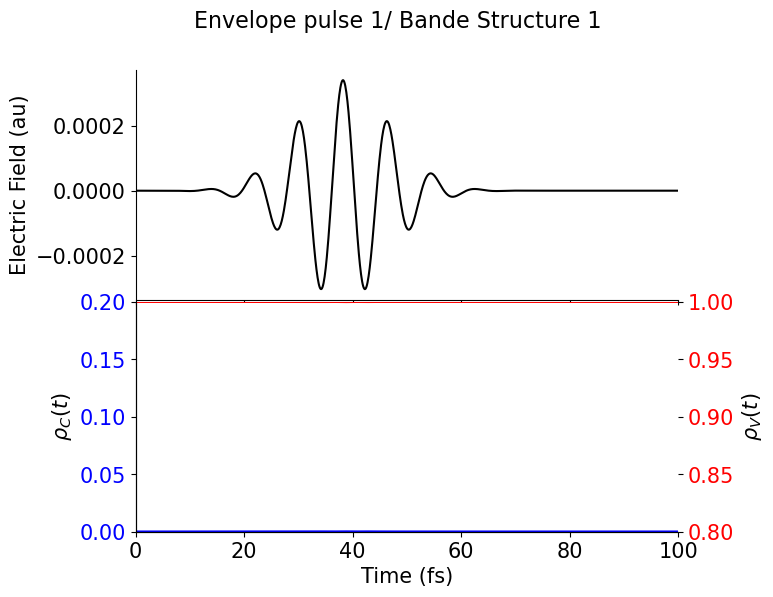

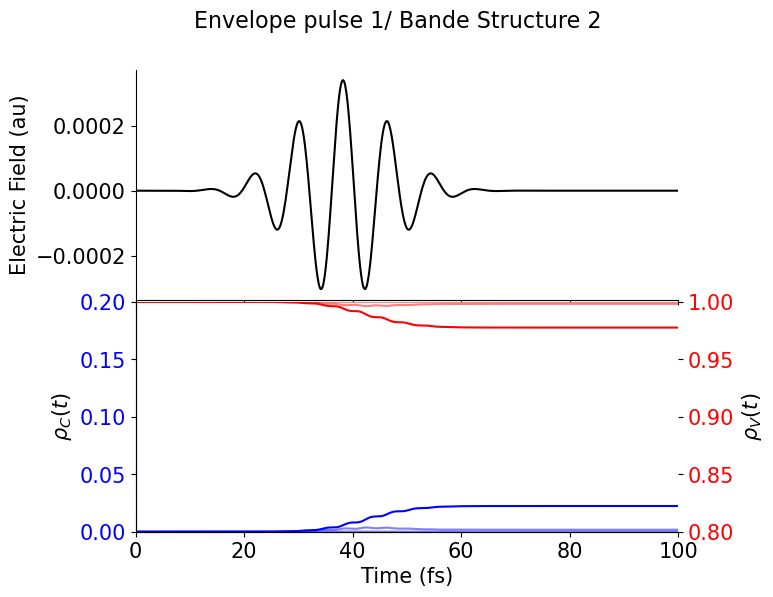

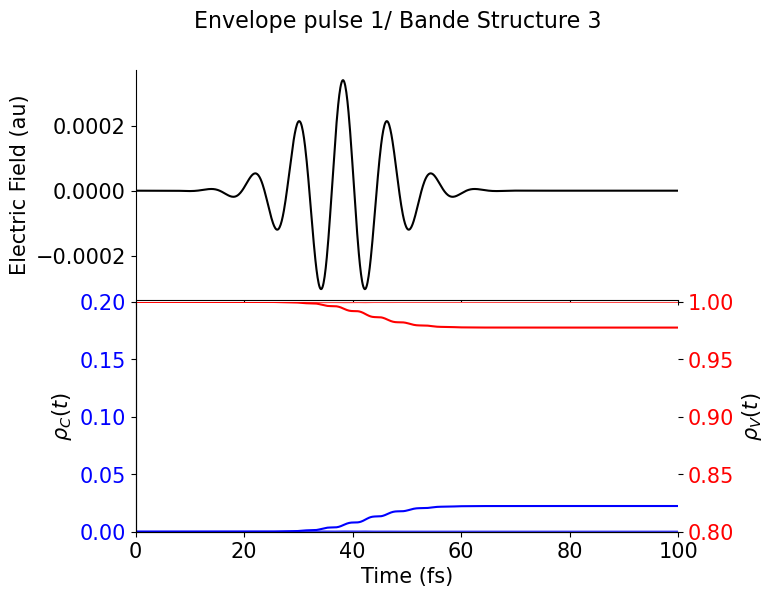

0

In [10]:

#---------------- Envelope pulse 1 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.3

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Envelope pulse 1", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')

k_list=[0, 0.25, 0.50, 0.75]
t_span= (t[0],t[-1])

#---------------- Envelope pulse 1/ Bande Structure 1---------------
J     = 0.5/cst.Ry
delta = 1.0/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 1/ Bande Structure 1", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


#---------------- Envelope pulse 1/ Bande Structure 2---------------
J     = 1.0/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 1/ Bande Structure 2", t*cst.tfs,efield_case2,k_list,solutions.real,limits)



#---------------- Envelope pulse 1/ Bande Structure 3---------------
J     = 2.5/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 1/ Bande Structure 3", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


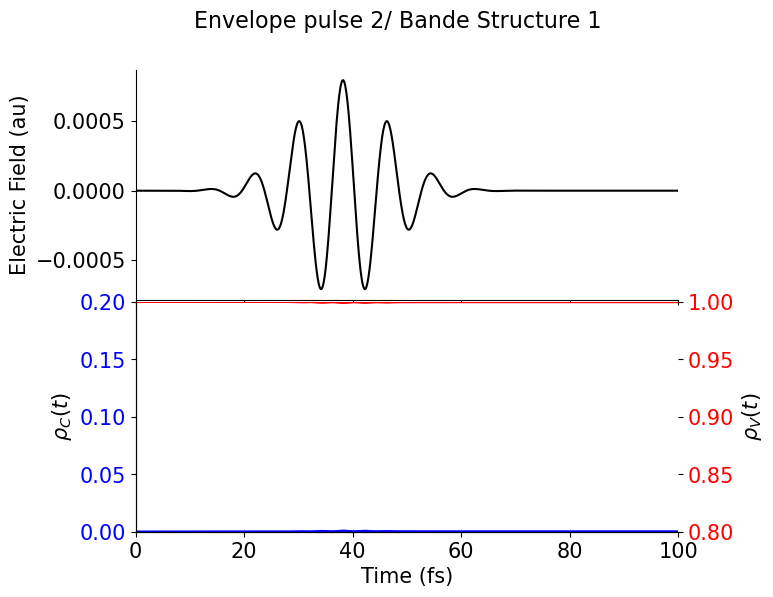

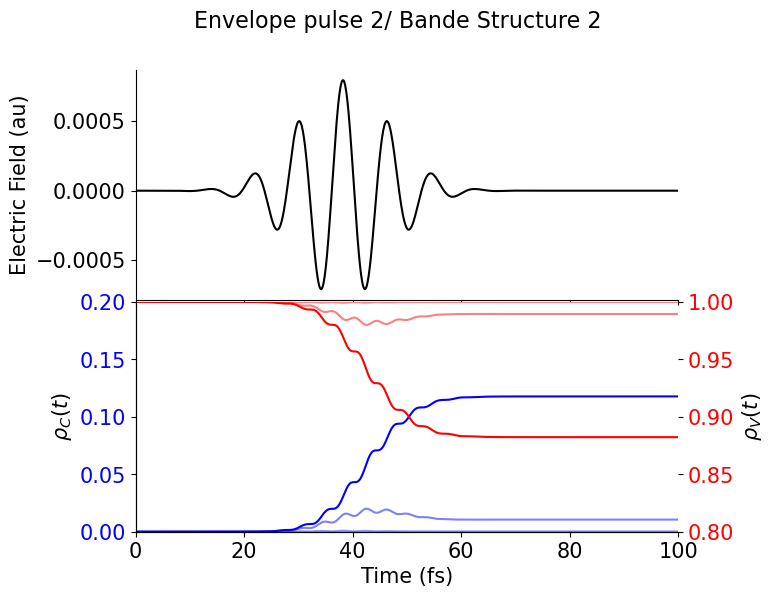

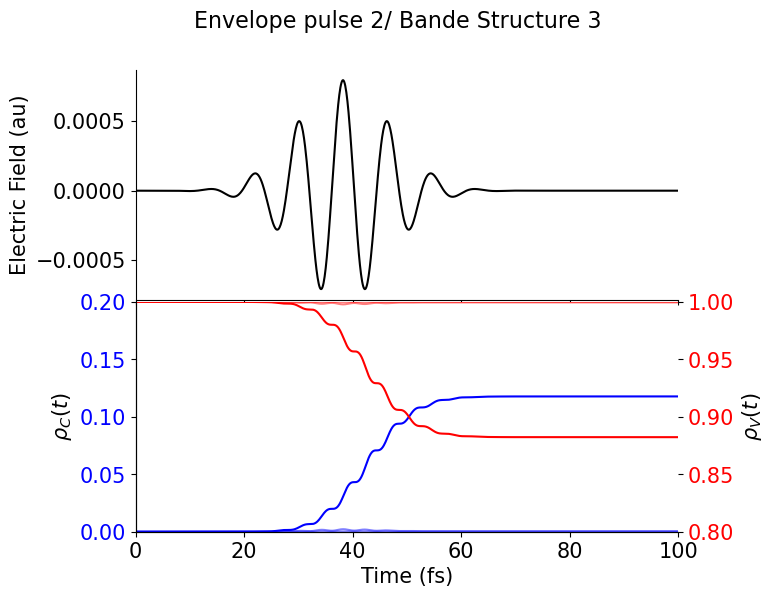

0

In [11]:

#---------------- Envelope pulse 2 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.7

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Envelope pulse 2", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')



#---------------- Envelope pulse 1/ Bande Structure 1---------------
J     = 0.5/cst.Ry
delta = 1.0/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 2/ Bande Structure 1", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


#---------------- Envelope pulse 2/ Bande Structure 2---------------
J     = 1.0/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 2/ Bande Structure 2", t*cst.tfs,efield_case2,k_list,solutions.real,limits)



#---------------- Envelope pulse 2/ Bande Structure 3---------------
J     = 2.5/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 2/ Bande Structure 3", t*cst.tfs,efield_case2,k_list,solutions.real,limits)




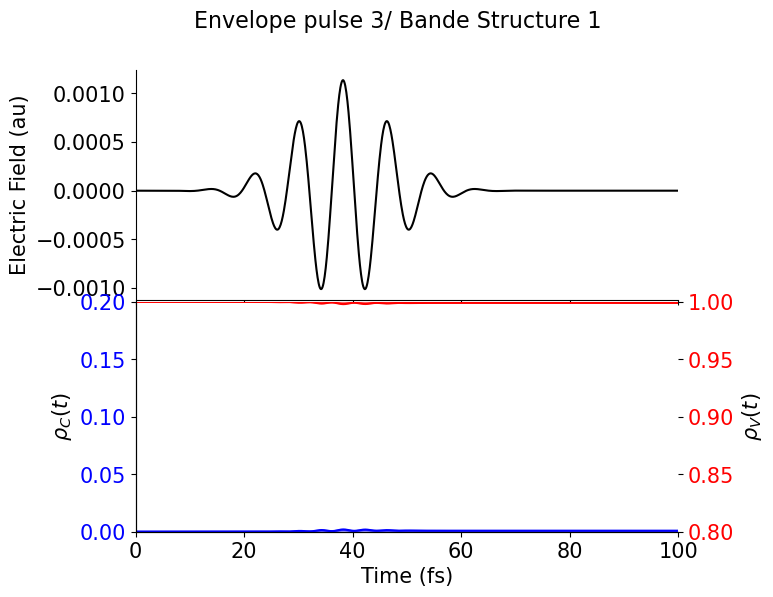

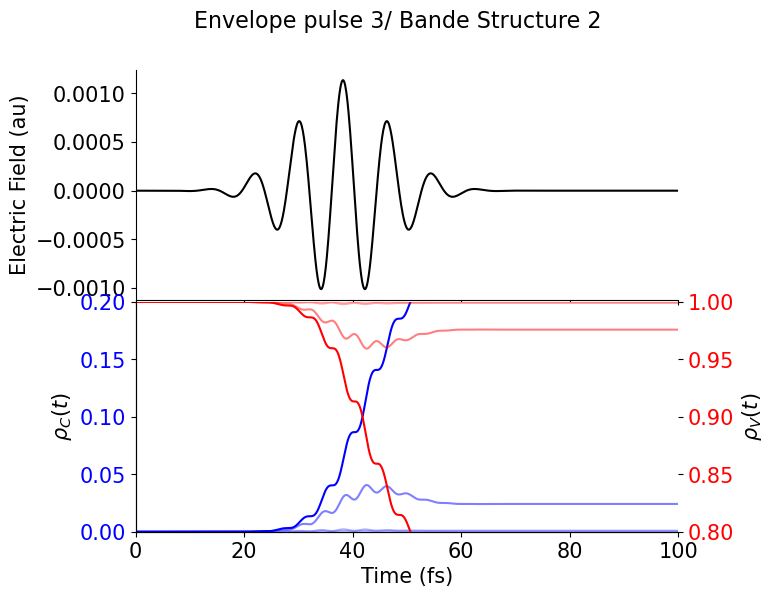

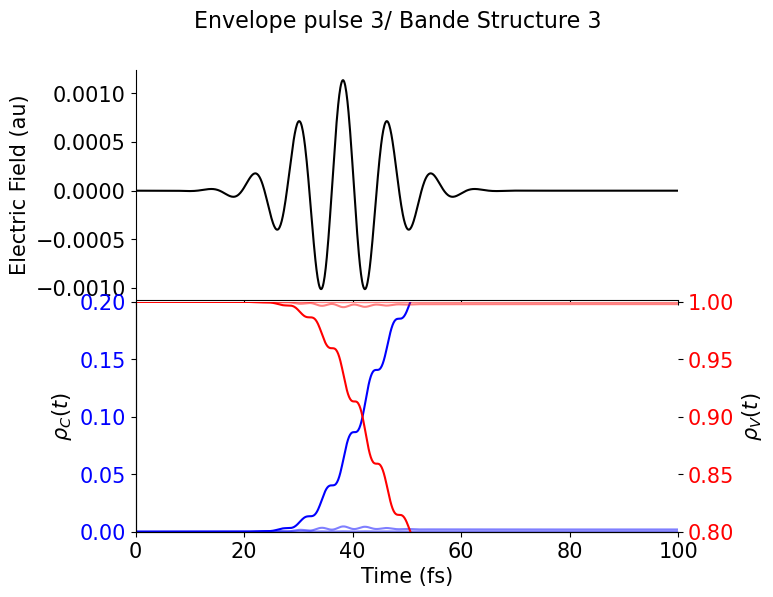

0

In [12]:

#---------------- Envelope pulse 3 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.0

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Envelope pulse 3", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')

#---------------- Envelope pulse 3/ Bande Structure 1---------------
J     = 0.5/cst.Ry
delta = 1.0/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 3/ Bande Structure 1", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


#---------------- Envelope pulse 3/ Bande Structure 2---------------
J     = 1.0/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 3/ Bande Structure 2", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


#---------------- Envelope pulse 3/ Bande Structure 3---------------
J     = 2.5/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 3/ Bande Structure 3", t*cst.tfs,efield_case2,k_list,solutions.real,limits)






# Using DMD Package

The code below uses a significant time delay (and hankel preprocessing) in order to generate a proper DMD. It works very well for k=50 (maximum amplitude). 

It does't work as well for smaller amplitudes (Large relative error, but very small absolute error considering the size of the amplitudes )

### A first case 

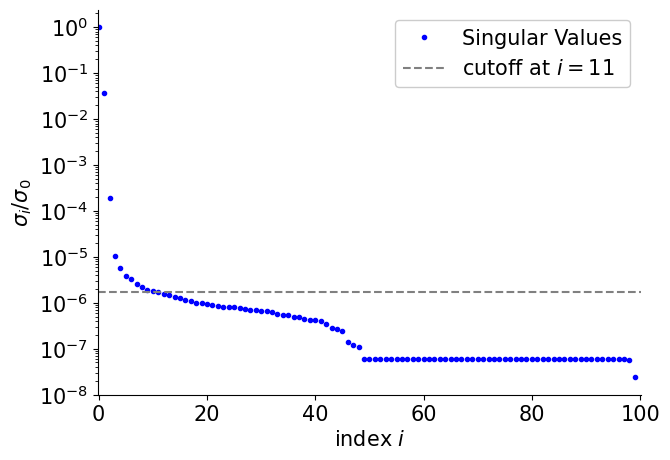

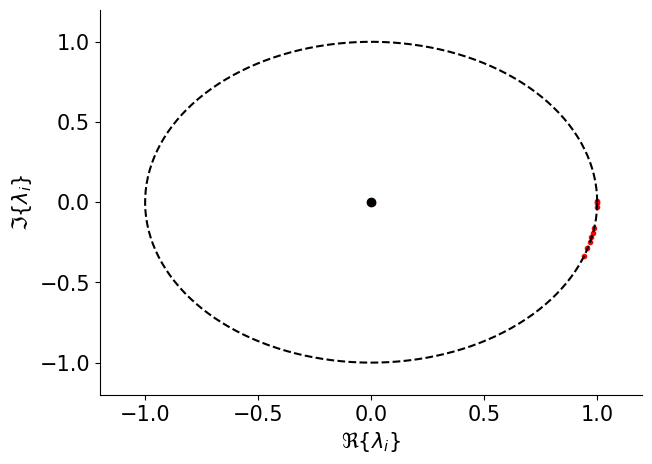

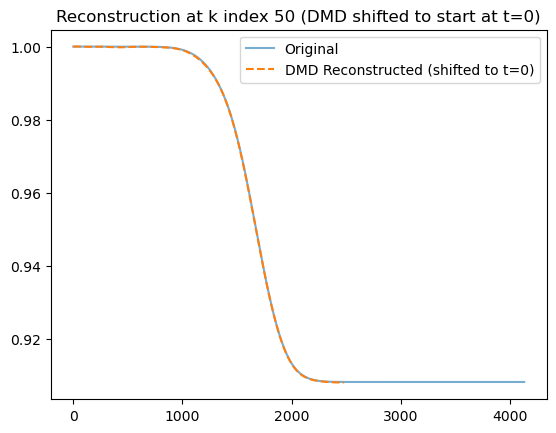

In [13]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from pydmd import DMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing



# ====== Set up the simulation ======
#-------------- Simple Pulse 3 / Band structure 2--------------
case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.9
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



#Get the simualtion ready for DMD use:
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead




# ========= Apply DMD ===========
rank=11
#truncamiento=-6


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, rank)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y, False, orden_truncado=rank)
plotting.plot_singular_values(Sig2,rank, False) 
plotting.plot_eigenvalues(mu)


delay = 400  # we will use this number of delays throughout the tutorial         
dmd = DMD(svd_rank=rank)
delay_dmd = hankel_preprocessing(dmd, d=delay)
delay_dmd.fit(X)

# Reconstruction
X_dmd = dmd.reconstructed_data.real  # or .imag or .abs()
# Optional: get eigenvalues or modes
eigs = dmd.eigs
modes = dmd.modes

# Chop the first 399 time points to align with DMD output
t_dmd_shifted = t_dmd[:600]
#t_dmd_shifted = t_dmd[delay-1:] #use this line instead of the line above and DMD will stop working (also reset delay=2)

# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[50].real[:len(t_dmd_shifted)] 


# Plot
plt.plot(t_dmd, X[50].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Reconstruction at k index 50 (DMD shifted to start at t=0)")
plt.show()



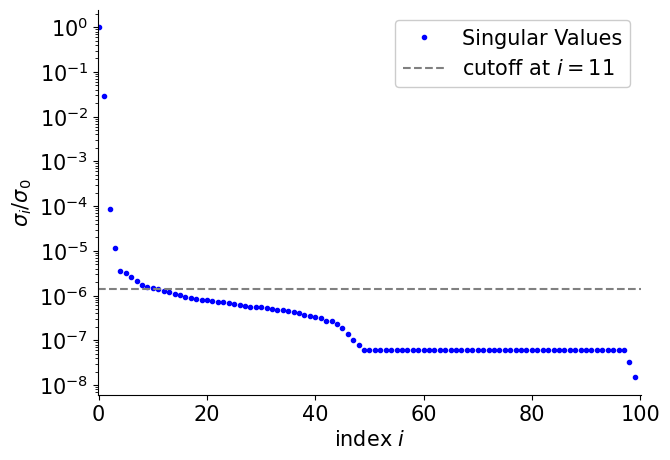

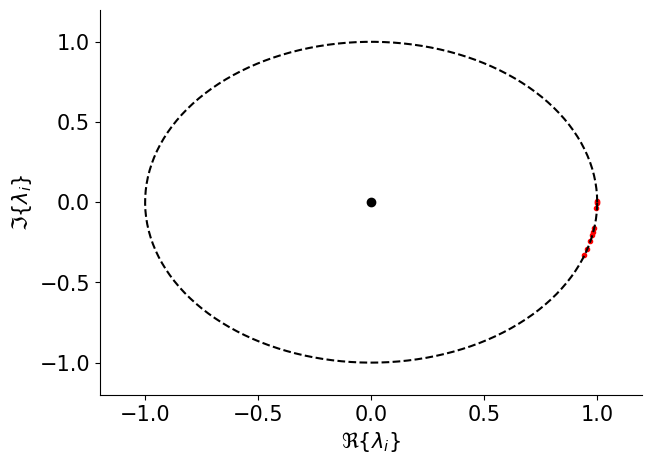

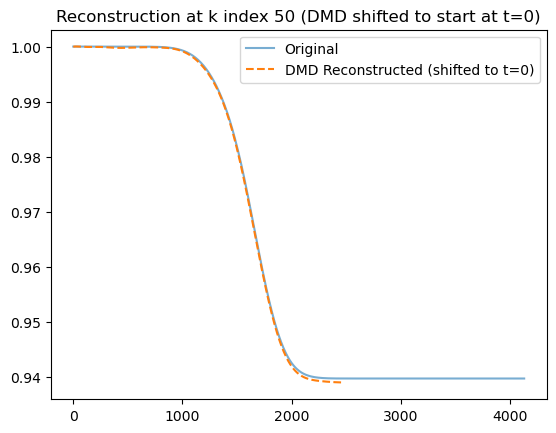

In [14]:

# ====== Set up the simulation ======
#-------------- Simple Pulse 2 / Band structure 2--------------
case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.7
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



#Get the simualtion ready for DMD use:
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead




# ========= Apply DMD ===========
rank=11
#truncamiento=-6


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, rank)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y, False, orden_truncado=rank)
plotting.plot_singular_values(Sig2,rank, False) 
plotting.plot_eigenvalues(mu)


delay = 400  # we will use this number of delays throughout the tutorial         
dmd = DMD(svd_rank=rank)
delay_dmd = hankel_preprocessing(dmd, d=delay)
delay_dmd.fit(X)

# Reconstruction
X_dmd = dmd.reconstructed_data.real  # or .imag or .abs()
# Optional: get eigenvalues or modes
eigs = dmd.eigs
modes = dmd.modes



# Chop the first 399 time points to align with DMD output
t_dmd_shifted = t_dmd[:600]
#t_dmd_shifted = t_dmd[delay-1:] #use this line instead of the line above and DMD will stop working (also reset delay=2)

# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[50].real[:len(t_dmd_shifted)] 


# Plot
plt.plot(t_dmd, X[50].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Reconstruction at k index 50 (DMD shifted to start at t=0)")
plt.show()



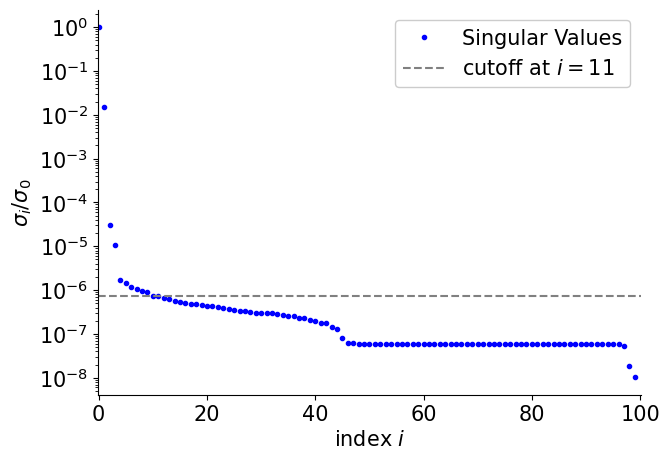

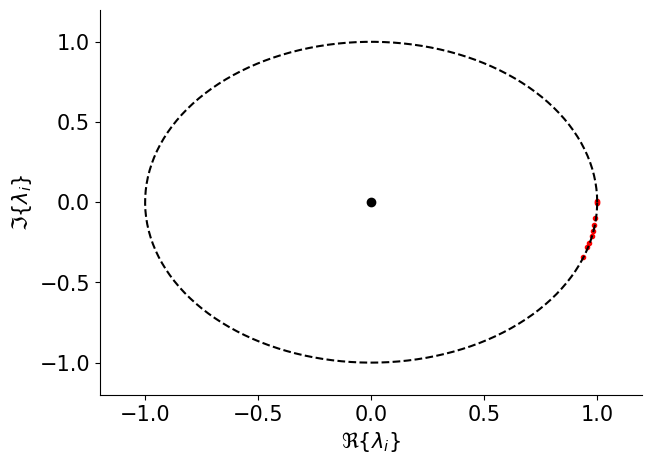

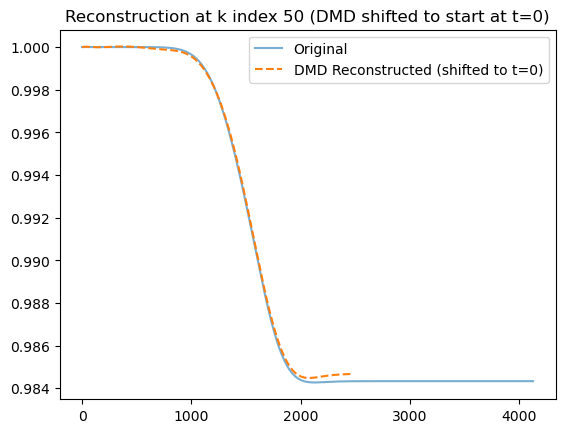

In [15]:

# ====== Set up the simulation ======
#-------------- Simple Pulse 1 / Band structure 2--------------
case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.2
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



#Get the simualtion ready for DMD use:
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead




# ========= Apply DMD ===========
rank=11
#truncamiento=-6


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, rank)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y, False, orden_truncado=rank)
plotting.plot_singular_values(Sig2,rank, False) 
plotting.plot_eigenvalues(mu)


delay = 400  # we will use this number of delays throughout the tutorial         
dmd = DMD(svd_rank=rank)
delay_dmd = hankel_preprocessing(dmd, d=delay)
delay_dmd.fit(X)

# Reconstruction
X_dmd = dmd.reconstructed_data.real  # or .imag or .abs()
# Optional: get eigenvalues or modes
eigs = dmd.eigs
modes = dmd.modes

# Chop the first 399 time points to align with DMD output
t_dmd_shifted = t_dmd[:600]
#t_dmd_shifted = t_dmd[delay-1:] #use this line instead of the line above and DMD will stop working (also reset delay=2)

# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[50].real[:len(t_dmd_shifted)] 


# Plot
plt.plot(t_dmd, X[50].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Reconstruction at k index 50 (DMD shifted to start at t=0)")
plt.show()



### Three cases with the envelope pulse


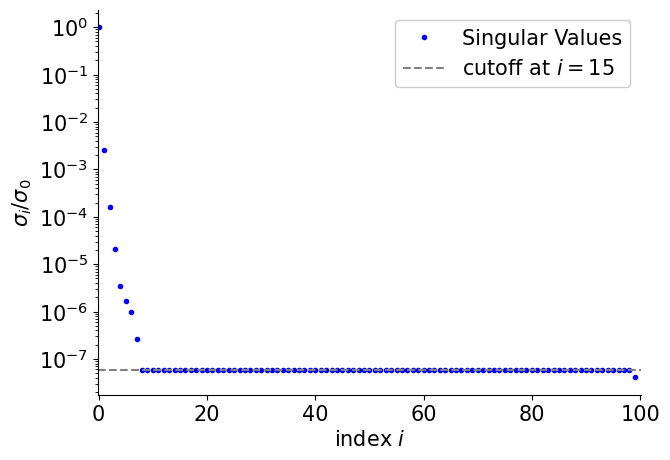

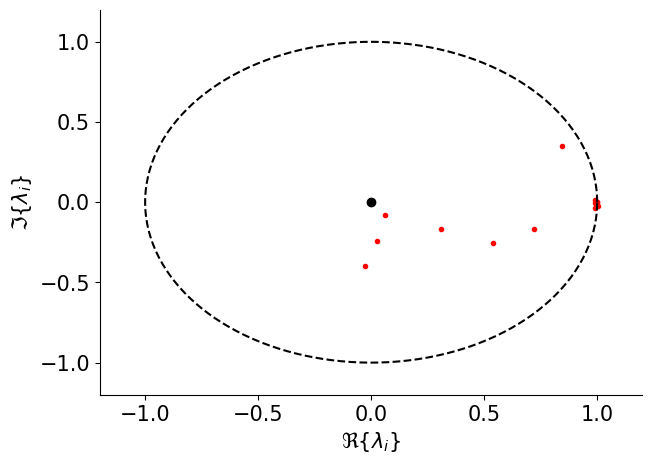

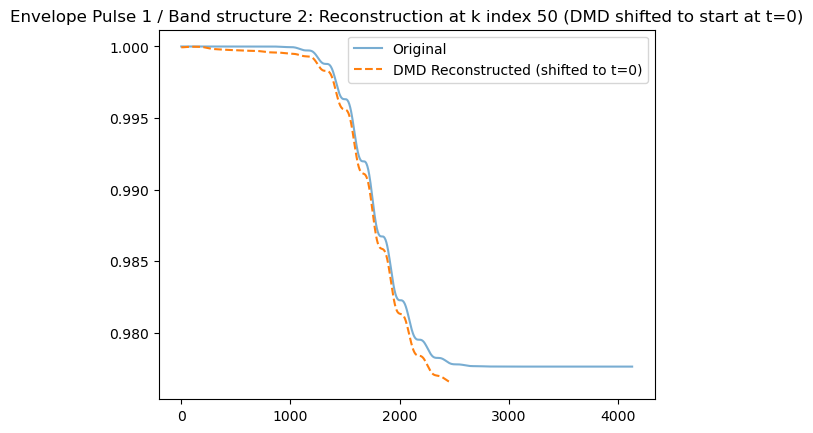

In [16]:

# ====== Set up the simulation ======
#-------------- Envelope Pulse 1 / Band structure 2--------------

case = 2
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.3
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])

#Get the simualtion ready for DMD use:
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead

# ========= Apply DMD ===========
rank=15
#truncamiento=-6


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, rank)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y, False, orden_truncado=rank)
plotting.plot_singular_values(Sig2,rank, False) 
plotting.plot_eigenvalues(mu)


delay = 400  # we will use this number of delays throughout the tutorial         
dmd = DMD(svd_rank=rank)
delay_dmd = hankel_preprocessing(dmd, d=delay)
delay_dmd.fit(X)

# Reconstruction
X_dmd = dmd.reconstructed_data.real  # or .imag or .abs()
# Optional: get eigenvalues or modes
eigs = dmd.eigs
modes = dmd.modes

# Chop the first 399 time points to align with DMD output
t_dmd_shifted = t_dmd[:600]
#t_dmd_shifted = t_dmd[delay-1:] #use this line instead of the line above and DMD will stop working (also reset delay=2)

# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[50].real[:len(t_dmd_shifted)] 


# Plot
plt.plot(t_dmd, X[50].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Envelope Pulse 1 / Band structure 2: Reconstruction at k index 50 (DMD shifted to start at t=0)")
plt.show()



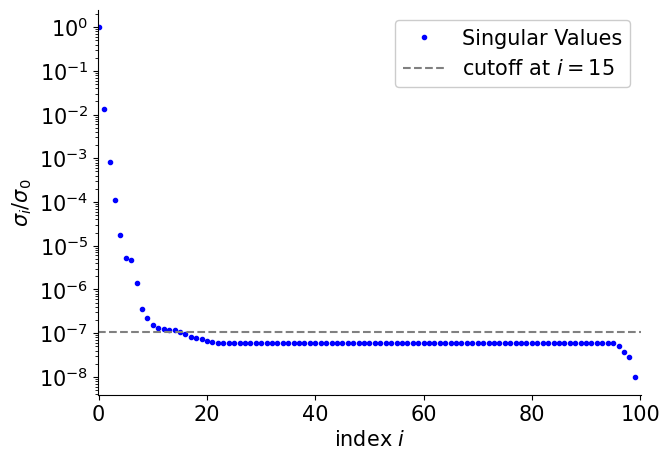

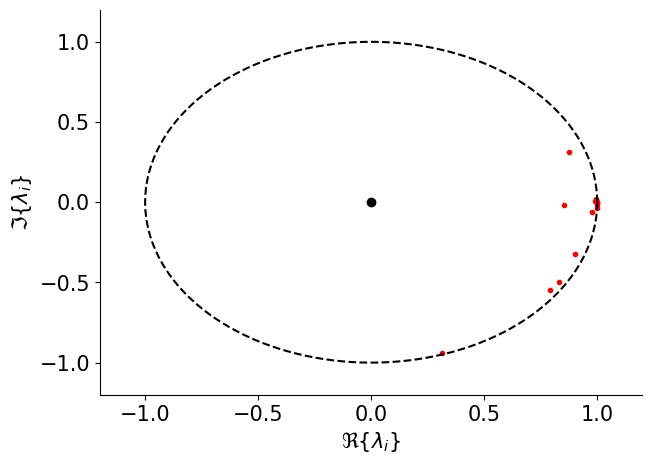

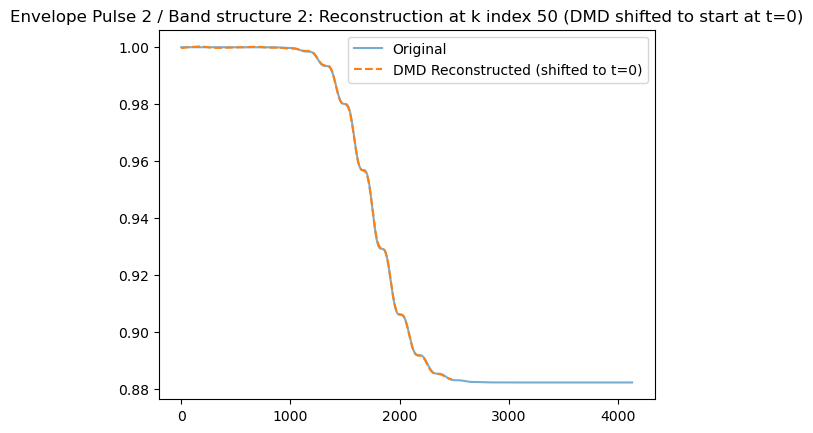

In [40]:

# ====== Set up the simulation ======
#-------------- Envelope Pulse 2 / Band structure 2--------------

case = 2
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.7
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



#Get the simualtion ready for DMD use:
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead


# ========= Apply DMD ===========
rank=15
#truncamiento=-6


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, rank)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y, False, orden_truncado=rank)
plotting.plot_singular_values(Sig2,rank, False) 
plotting.plot_eigenvalues(mu)


delay = 400  # we will use this number of delays throughout the tutorial         
dmd = DMD(svd_rank=rank)
delay_dmd = hankel_preprocessing(dmd, d=delay)
delay_dmd.fit(X)

# Reconstruction
X_dmd = dmd.reconstructed_data.real  # or .imag or .abs()
# Optional: get eigenvalues or modes
eigs = dmd.eigs
modes = dmd.modes

# Chop the first 399 time points to align with DMD output
t_dmd_shifted = t_dmd[:600]
#t_dmd_shifted = t_dmd[delay-1:] #use this line instead of the line above and DMD will stop working (also reset delay=2)

# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[50].real[:len(t_dmd_shifted)] 


# Plot
plt.plot(t_dmd, X[50].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Envelope Pulse 2 / Band structure 2: Reconstruction at k index 50 (DMD shifted to start at t=0)")
plt.show()



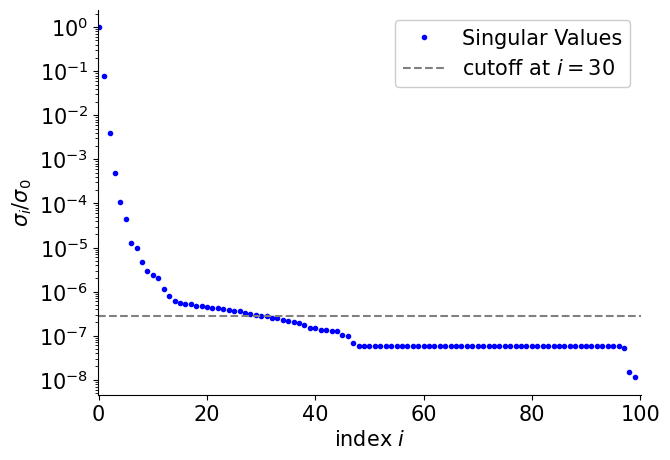

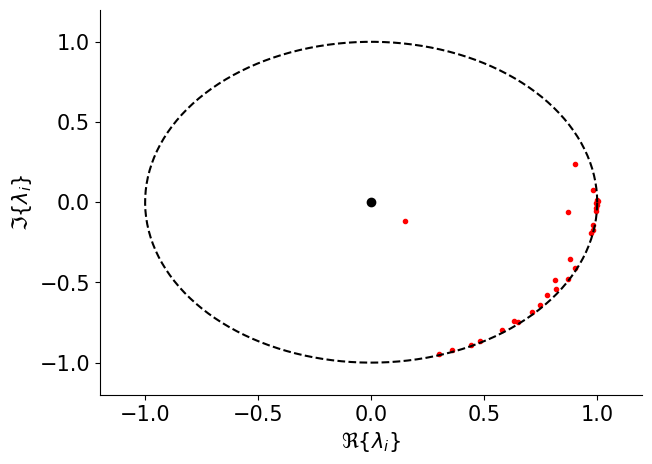

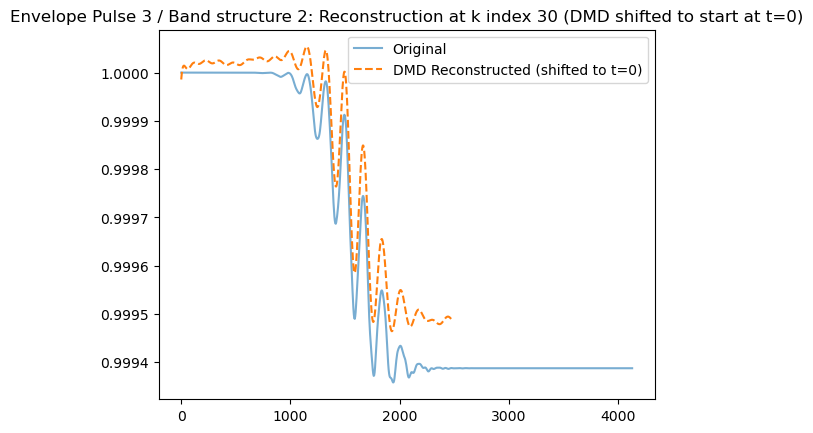

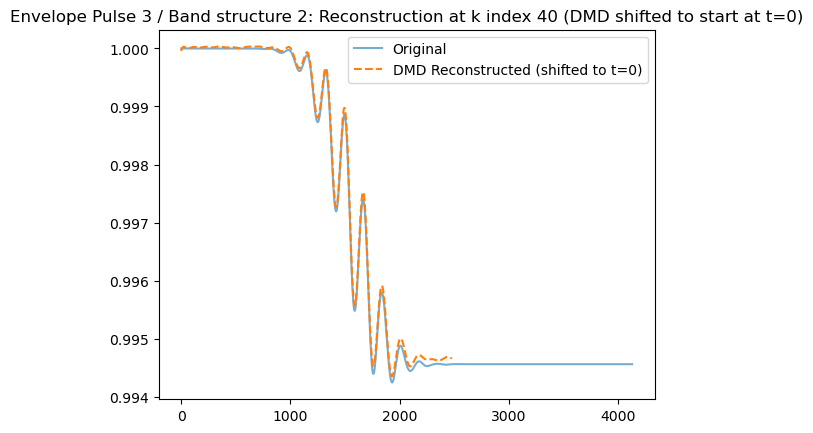

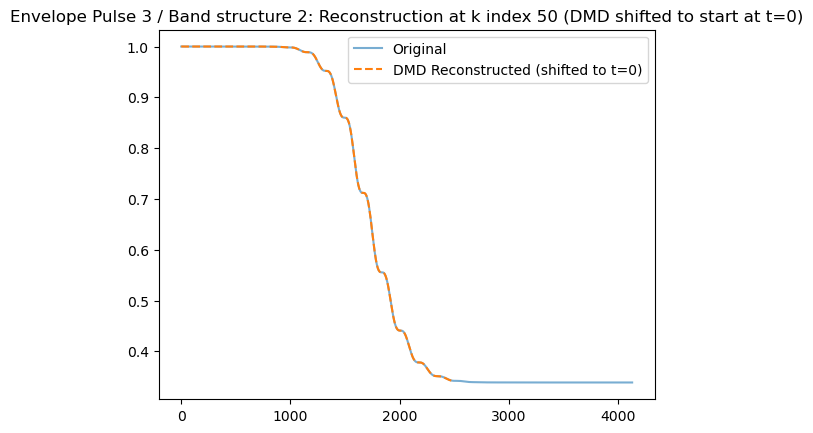

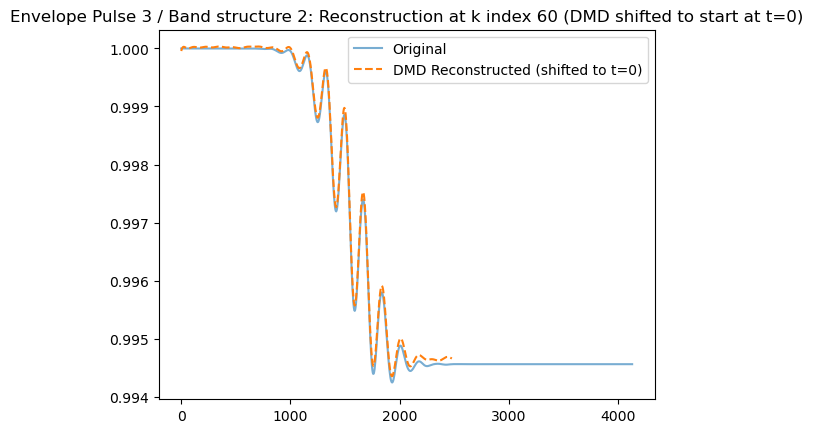

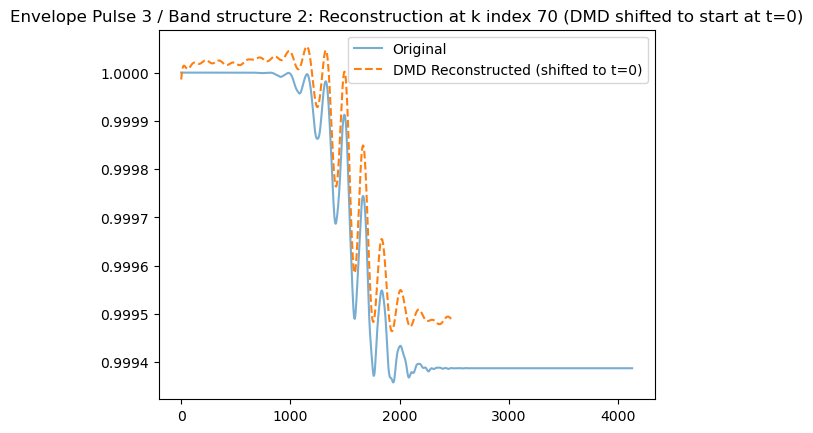

In [61]:

# ====== Set up the simulation ======
#-------------- Envelope Pulse 3 (E0=1.9) / Band structure 2--------------

case = 2
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.9
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



#Get the simualtion ready for DMD use:
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead


# ========= Apply DMD ===========
rank=30
#truncamiento=-6


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, rank)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y, False, orden_truncado=rank)
plotting.plot_singular_values(Sig2,rank, False) 
plotting.plot_eigenvalues(mu)


delay = 400  # we will use this number of delays throughout the tutorial         
dmd = DMD(svd_rank=rank)
delay_dmd = hankel_preprocessing(dmd, d=delay)
delay_dmd.fit(X)

# Reconstruction
X_dmd = dmd.reconstructed_data.real  # or .imag or .abs()
# Optional: get eigenvalues or modes
eigs = dmd.eigs
modes = dmd.modes

# Chop the first 399 time points to align with DMD output
t_dmd_shifted = t_dmd[:600]
#t_dmd_shifted = t_dmd[delay-1:] #use this line instead of the line above and DMD will stop working (also reset delay=2)




# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[30].real[:len(t_dmd_shifted)] 
# Plot
plt.plot(t_dmd, X[30].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Envelope Pulse 3 / Band structure 2: Reconstruction at k index 30 (DMD shifted to start at t=0)")
plt.show()






# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[40].real[:len(t_dmd_shifted)] 
# Plot
plt.plot(t_dmd, X[40].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Envelope Pulse 3 / Band structure 2: Reconstruction at k index 40 (DMD shifted to start at t=0)")
plt.show()






# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[50].real[:len(t_dmd_shifted)] 
# Plot
plt.plot(t_dmd, X[50].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Envelope Pulse 3 / Band structure 2: Reconstruction at k index 50 (DMD shifted to start at t=0)")
plt.show()





# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[60].real[:len(t_dmd_shifted)] 
# Plot
plt.plot(t_dmd, X[60].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Envelope Pulse 3 / Band structure 2: Reconstruction at k index 60 (DMD shifted to start at t=0)")
plt.show()






# Truncate DMD data to match the shortened time axis
x_dmd_shifted = X_dmd[70].real[:len(t_dmd_shifted)] 
# Plot
plt.plot(t_dmd, X[70].real, label="Original", alpha=0.6)
plt.plot(t_dmd_shifted, x_dmd_shifted, label="DMD Reconstructed (shifted to t=0)", linestyle='--')
plt.legend()
plt.title("Envelope Pulse 3 / Band structure 2: Reconstruction at k index 70 (DMD shifted to start at t=0)")
plt.show()



### Note about the above: 

Increase the truncation rank increases the quality of the prediction reconstruction. 

This is most visible for very small changes, when $k\neq50$. 

# Without using the time delay (With the pulse starting at $t_0=0$)

This is out of curiosity, to compare with the problems I had in my own implementation of DMD reconstruction. 

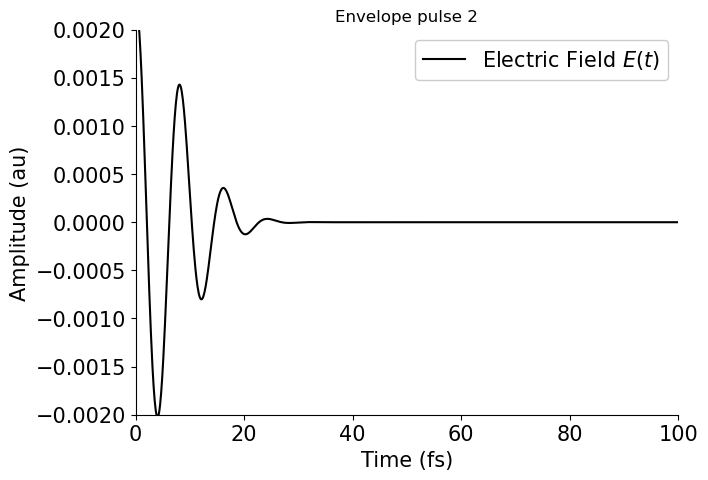

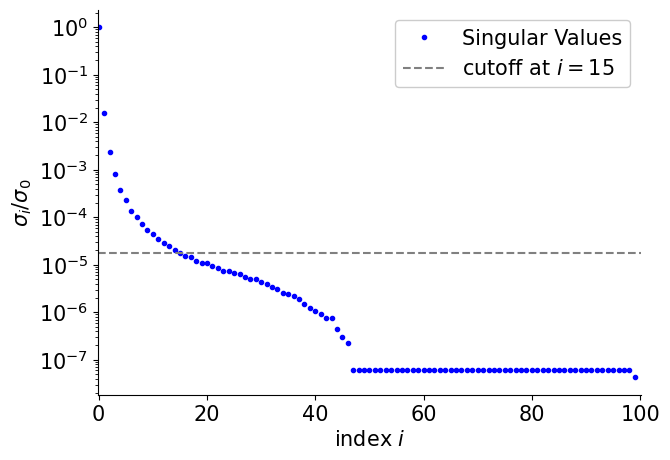

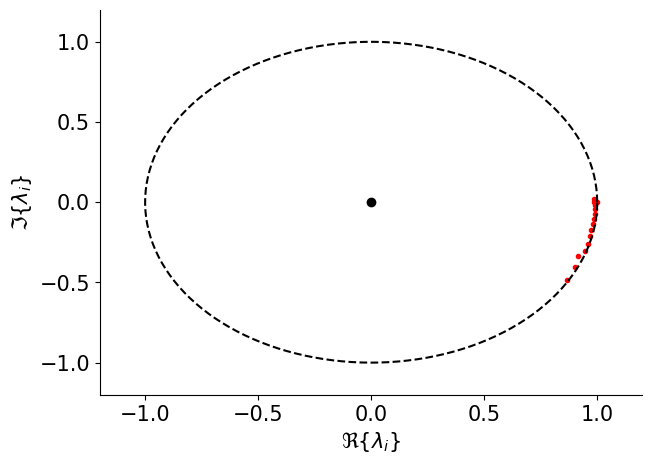

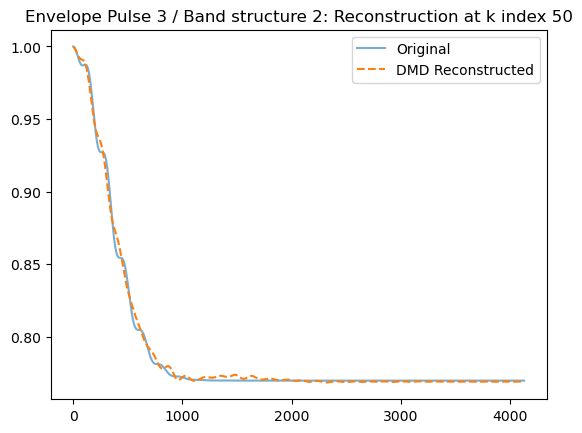

In [62]:
#========================================================================================
#============================      System      ==========================================
def eps_vb(k, J, delta):
    return  2. * J * np.cos(k) - 2. * J - delta / 2.

def eps_cb(k, J, delta):
    return -2. * J * np.cos(k) + 2. * J + delta / 2.

def delta_epsilon(k, J, delta):
    return eps_cb(k,J, delta) - eps_vb(k,J, delta)



def E(t, sigma, E0, ω=0,case=1, t0=None):
    if t0 == None:
        t0=0#t0=4.5*sigma

    if case==1:
        return E0 / (np.sqrt(2 * np.pi * sigma ** 2)) * np.exp((-(t - t0) ** 2) / (2 * sigma ** 2))
    if case==2:
        return E0 / (np.sqrt(2 * np.pi * sigma ** 2)) * np.exp((-(t - t0) ** 2) / (2 * sigma ** 2)) * np.cos(ω * (t - t0))

def V(t, k, sigma, E0, ω=0,case=1):
    return -E(t, sigma, E0, ω, case) #* D(k)

#========================================================================================
#============================  Density Operator =========================================

def A(t, k, J, delta, sigma, E0, ω, case):
    v = V(t, k, sigma, E0, ω, case)
    dE = delta_epsilon(k, J, delta)
    return np.array([
        [0,     0,     -1j * v,   1j * v],
        [0,     0,      1j * v,  -1j * v],
        [-1j * v, 1j * v, -1j * dE,     0],
        [1j * v, -1j * v,     0,  -1j * dE]
    ], dtype=np.complex64)

def rhs(t, y, k, J, delta, sigma, E0, ω=0,case=1):
    return A(t, k, J, delta, sigma, E0, ω,case) @ y




# ====== Set up the simulation ======
#-------------- Envelope Pulse 3 / Band structure 2--------------

case = 2
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 2.0
t = np.linspace(0, 100, 1000)/ cst.tfs

efield_case1 = E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Envelope pulse 2", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002,0.002]]),fout='')

J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



#Get the simualtion ready for DMD use:
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead


# ========= Apply DMD ===========
rank=15 # 35
#truncamiento=-6


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, rank)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y, False, orden_truncado=rank)
plotting.plot_singular_values(Sig2,rank, False) 
plotting.plot_eigenvalues(mu)


delay = 2  # we will use this number of delays throughout the tutorial         
dmd = DMD(svd_rank=rank)
#delay_dmd = hankel_preprocessing(dmd, d=delay)
#delay_dmd.fit(X)
dmd.fit(X)

# Reconstruction
X_dmd = dmd.reconstructed_data.real  # or .imag or .abs()
# Optional: get eigenvalues or modes
eigs = dmd.eigs
modes = dmd.modes

# Chop the first 399 time points to align with DMD output
#t_dmd_shifted = t_dmd[:998]
#t_dmd_shifted = t_dmd[delay-1:] #use this line instead of the line above and DMD will stop working (also reset delay=2)

# Truncate DMD data to match the shortened time axis
#x_dmd_shifted = X_dmd[50].real[:len(t_dmd_shifted)] 


# Plot
plt.plot(t_dmd, X[50].real, label="Original", alpha=0.6)
plt.plot(t_dmd, X_dmd[50].real, label="DMD Reconstructed", linestyle='--')
plt.legend()
plt.title("Envelope Pulse 3 / Band structure 2: Reconstruction at k index 50")
plt.show()



# Doing the same but with the simple pulse (Still at $t_0=0$)

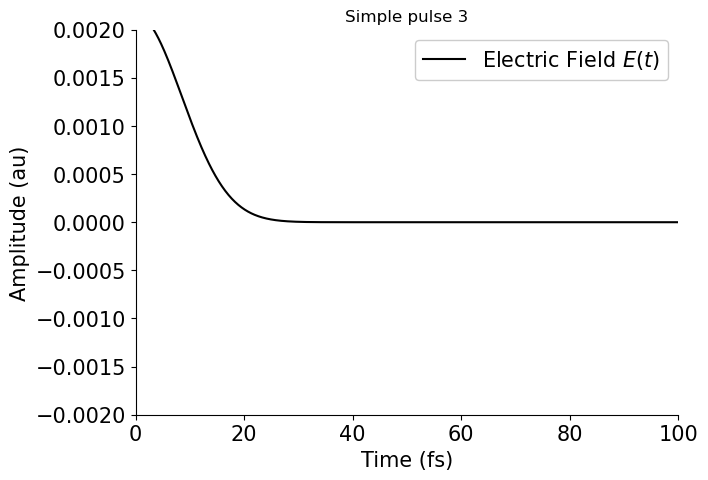

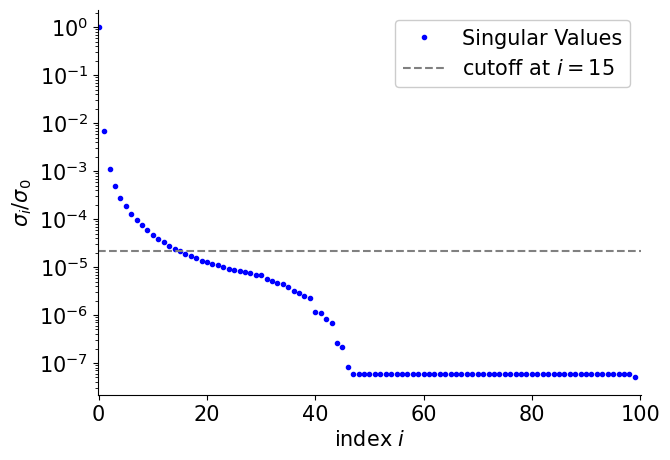

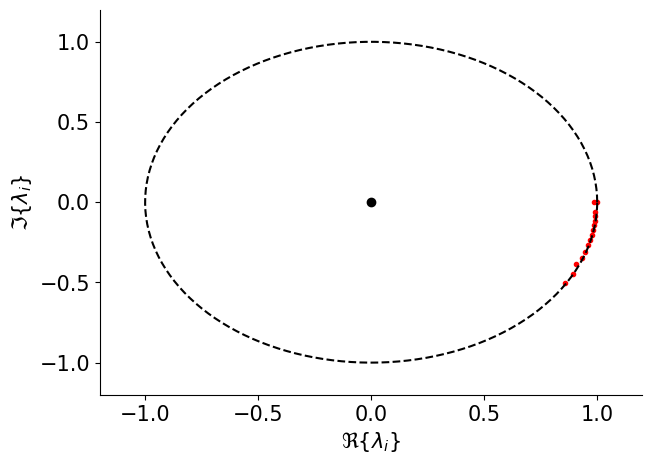

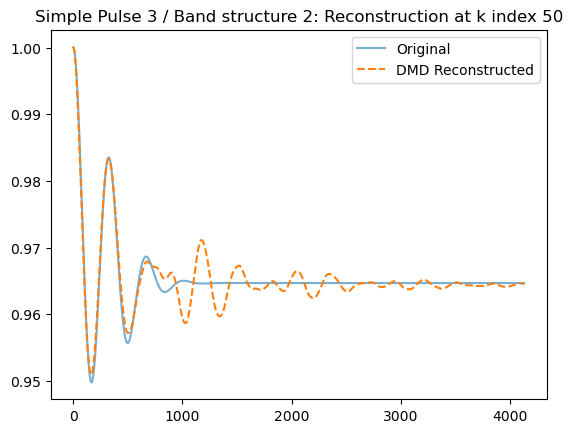

In [63]:



# ====== Set up the simulation ======
#-------------- Simple Pulse 3 / Band structure 2--------------

case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.9
t = np.linspace(0, 100, 1000)/ cst.tfs

efield_case1 = E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Simple pulse 3", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002,0.002]]),fout='')

J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



#Get the simualtion ready for DMD use:
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead


# ========= Apply DMD ===========
rank= 15
#truncamiento=-6


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, rank)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y, False, orden_truncado=rank)
plotting.plot_singular_values(Sig2,rank, False) 
plotting.plot_eigenvalues(mu)


delay = 2  # we will use this number of delays throughout the tutorial         
dmd = DMD(svd_rank=rank)
#delay_dmd = hankel_preprocessing(dmd, d=delay)
#delay_dmd.fit(X)
dmd.fit(X)

# Reconstruction
X_dmd = dmd.reconstructed_data.real  # or .imag or .abs()
# Optional: get eigenvalues or modes
eigs = dmd.eigs
modes = dmd.modes


# Plot
plt.plot(t_dmd, X[50].real, label="Original", alpha=0.6)
plt.plot(t_dmd, X_dmd[50].real, label="DMD Reconstructed", linestyle='--')
plt.legend()
plt.title("Simple Pulse 3 / Band structure 2: Reconstruction at k index 50")
plt.show()

